# Loan Dataset Analysis - Part 1

## Table of Contents
1. [Introduction](#introduction)
2. [Preliminary Wrangling](#preliminary-wrangling)
3. [Data Exploration and Visualization](#data-exploration-and-visualization)
   - [Univariate Exploration](#univariate-exploration)
   - [Bivariate Exploration](#bivariate-exploration)
   - [Multivariate Exploration](#multivariate-exploration)
4. [Documentation](#documentation)

## I. Introduction

The loan dataset contains information about various loans with features including credit scores, loan amounts, interest rates, and borrower information. This dataset provides insights into loan characteristics and borrower profiles.

**Questions to Answer:**
1. What is the distribution of loan amounts?
2. How do loan amounts vary by credit grade?
3. Is there a relationship between loan amount and interest rate?
4. Do loan amounts vary by borrower state?
5. How do loan amounts vary by occupation?

## II. Preliminary Wrangling

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('prosperLoanData.csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop rows with NaN values in numerical columns related to monetary values
monetary_cols = ['LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees']
df.dropna(subset=monetary_cols, inplace=True)

# Convert 'LoanOriginationDate' to datetime
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

# Create 'LoanOriginationYear' column
df['LoanOriginationYear'] = df['LoanOriginationDate'].dt.year

# Display the updated dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Features of Interest:

1. LoanOriginalAmount: Amount of the loan.
2. CreditGrade: Credit grade of the borrower.
3. BorrowerState: State of the borrower.
4. Occupation: Occupation of the borrower.
5. BorrowerAPR: Annual percentage rate of the borrower.


## III. Data Exploration and Visualization

### 1. Univariate Exploration

<strong>Histogram of Loan Amounts</strong>

<strong>Question</strong>: What is the distribution of loan amounts?

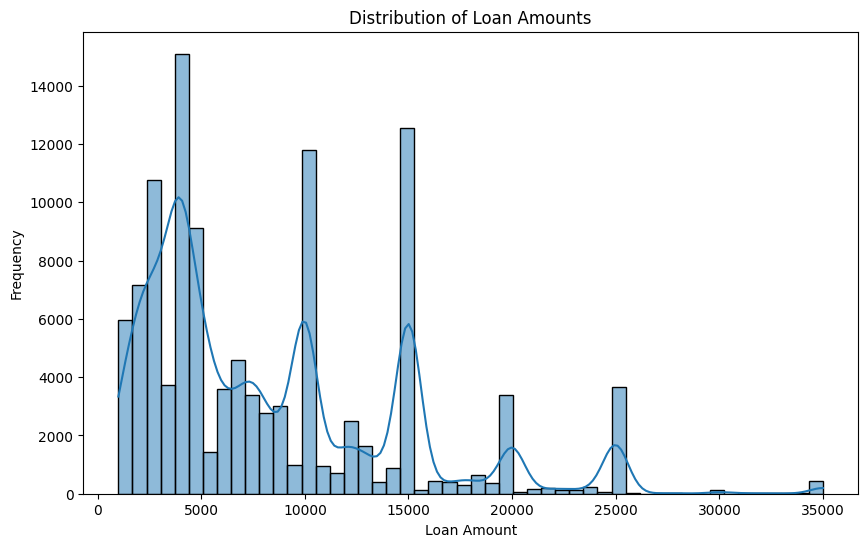

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanOriginalAmount'], bins=50, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

<strong>Observation</strong>: The histogram of loan amounts shows that most loans are relatively small, with a peak around the lower end of the amount spectrum. A few high-value loans skew the distribution to the right, indicating that while the majority of loans are of lower amounts, there are some significant outliers.

<strong>Bar Chart of Credit Grades</strong>

<strong>Question</strong>: How many loans are there in each credit grade?

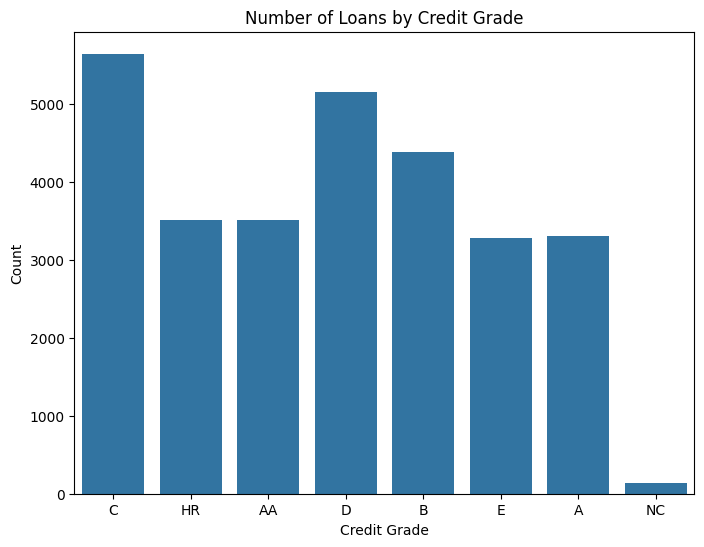

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CreditGrade', data=df)
plt.title('Number of Loans by Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Count')
plt.show()

<strong>Observation</strong>: The bar chart reveals the distribution of loans across different credit grades. This can help in understanding the overall credit quality of the loan portfolio and how loans are distributed among different credit grades.

<strong>Summary of Univariate Exploration</strong>: The univariate analysis shows that the majority of loans are small, and there is a range of credit grades among the loans. This indicates a diverse loan portfolio with varying credit quality.

### 2. Bivariate Exploration

<strong>Scatter Plot of Loan Amount vs. APR</strong>

<strong>Question</strong>: Is there a relationship between loan amount and APR?

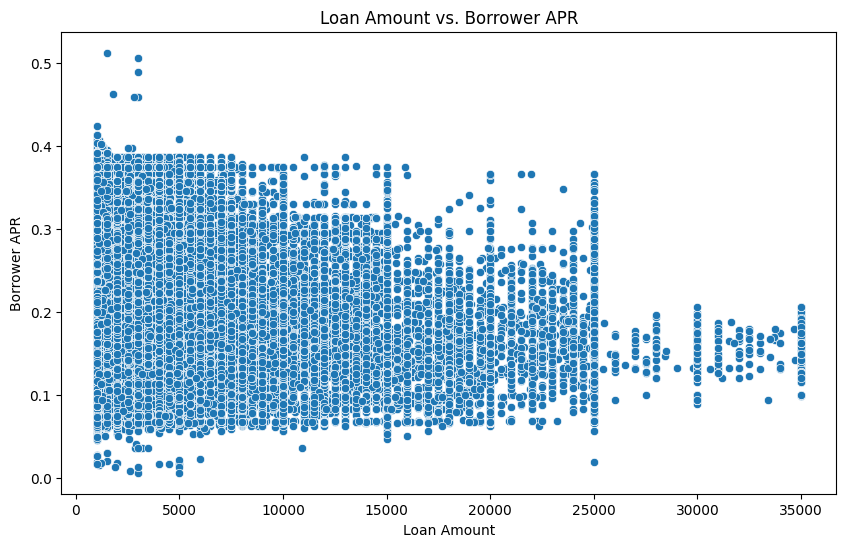

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoanOriginalAmount', y='BorrowerAPR', data=df)
plt.title('Loan Amount vs. Borrower APR')
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')
plt.show()

<strong>Observation</strong>: The scatter plot shows a general trend where higher loan amounts tend to have higher APRs. This relationship suggests that larger loans might be associated with higher risk or higher interest rates.

<strong>Box plot of Loan Amount by Borrower State</strong>

<strong>Question</strong>: Do loan amounts vary by borrower state?

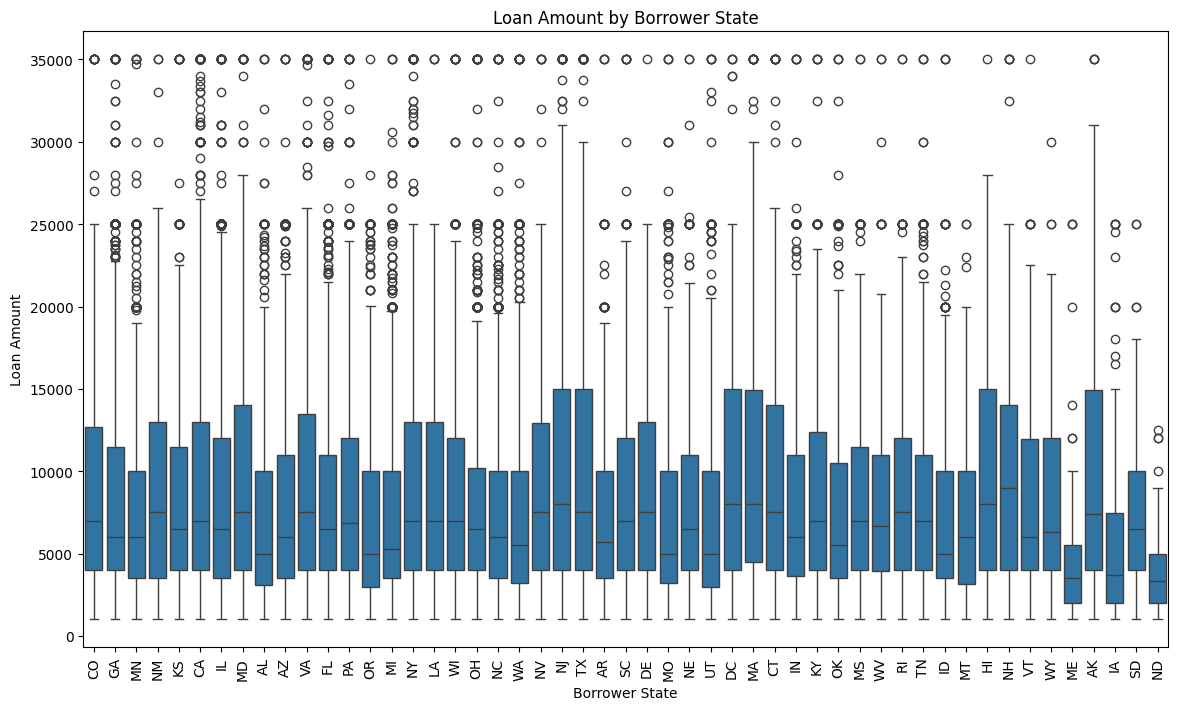

In [12]:
# Box plot of Loan Amount by Borrower State
plt.figure(figsize=(14, 8))
sns.boxplot(x='BorrowerState', y='LoanOriginalAmount', data=df)
plt.title('Loan Amount by Borrower State')
plt.xlabel('Borrower State')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.show()

<strong>Observation</strong>: The box plot shows that loan amounts vary significantly across different states. Some states have a higher median loan amount, while others show a wider range of loan values. This may reflect regional economic conditions or borrower characteristics.

<strong>Summary of Bivariate Exploration</strong>: The bivariate analysis reveals that there is a general positive relationship between loan amount and APR, with higher loan amounts tending to have higher APRs. Additionally, loan amounts vary by borrower state, indicating regional differences in loan sizes.

### 3. Multivariate Exploration

<strong>Pair Plot of Loan Amount, Borrower APR, and Credit Grade</strong>

<strong>Question</strong>: How do loan amount, APR, and credit grade interact with each other?

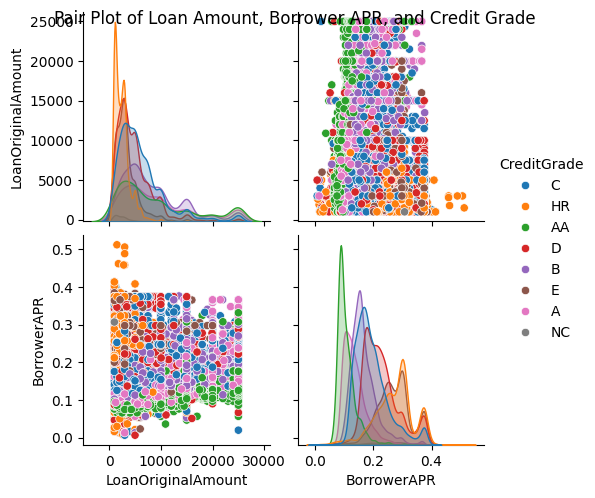

In [13]:
# Pair plot of Loan Amount, Borrower APR, and Credit Grade
sns.pairplot(df[['LoanOriginalAmount', 'BorrowerAPR', 'CreditGrade']], hue='CreditGrade')
plt.suptitle('Pair Plot of Loan Amount, Borrower APR, and Credit Grade')
plt.show()

<strong>Observation</strong>: The pair plot illustrates the relationships between loan amount, APR, and credit grade. There is a clear pattern where higher credit grades are associated with lower APRs, and larger loan amounts tend to be associated with higher APRs across different credit grades.

<strong>Summary of Multivariate Exploration</strong>: The multivariate analysis shows complex interactions between loan amount, APR, and credit grade. Higher credit grades are linked with lower APRs, while loan amounts generally increase with higher APRs.

## IV. Documentation

This notebook provides an analysis of a loan dataset with a focus on understanding the distribution and relationships of loan amounts, credit grades, and APRs. The analysis involves data cleaning, univariate, bivariate, and multivariate exploration to uncover insights about the loan portfolio.